# Spotify Analysis

First we install the necessary libraries needed for data visualization and wrangling. Additionally, the R wrapper, Spotifyr, which allows us to get insights from Spotify's web api is installed as well. 

In [1]:
library(tidyverse)
library(spotifyr)
library(repr)
library(lubridate)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




Below, we access the web API using the Client ID and Client Secret provided by Spotify upon creating a Developer Account.

In [6]:
access_token <- get_spotify_access_token()

## A Comparison Of My Playlists From Year 1 and Year 2 Of Undergrad
I have attempted to capture each year of my undergraduate degree in a unique playlist. So far, I have one and a half years' worth of data. I will begin my analysis using a playlist I began creating in the fall of 2022, my first year of university. I am interested in learning the general atmosphere of the playlist and how my music preference has changed throughout my first and second years of university. 

### 1. Data Loading & Cleaning

In [7]:
# Loading the playlist data frame into the "playlist_2022" variable

playlist_id <- "2cQLZcVSOLDfY03SY5DZrf"
username <- "AT"
y1_playlist <- get_playlist_audio_features(username, playlist_id)


In [8]:
# Getting all the column names of the data frame
colnames(y1_playlist)

[1] "playlist_id"                        "playlist_name"                     
 [3] "playlist_img"                       "playlist_owner_name"               
 [5] "playlist_owner_id"                  "danceability"                      
 [7] "energy"                             "key"                               
 [9] "loudness"                           "mode"                              
[11] "speechiness"                        "acousticness"                      
[13] "instrumentalness"                   "liveness"                          
[15] "valence"                            "tempo"                             
[17] "track.id"                           "analysis_url"                      
[19] "time_signature"                     "added_at"                          
[21] "is_local"                           "primary_color"                     
[23] "added_by.href"                      "added_by.id"                       
[25] "added_by.type"                      "added_by.uri"                      
[27] "added_by.external_urls.spotify"     "track.artists"                     
[29] "track.available_markets"            "track.disc_number"                 
[31] "track.duration_ms"                  "track.episode"                     
[33] "track.explicit"                     "track.href"                        
[35] "track.is_local"                     "track.name"                        
[37] "track.popularity"                   "track.preview_url"                 
[39] "track.track"                        "track.track_number"                
[41] "track.type"                         "track.uri"                         
[43] "track.album.album_type"             "track.album.artists"               
[45] "track.album.available_markets"      "track.album.href"                  
[47] "track.album.id"                     "track.album.images"                
[49] "track.album.name"                   "track.album.release_date"          
[51] "track.album.release_date_precision" "track.album.total_tracks"          
[53] "track.album.type"                   "track.album.uri"                   
[55] "track.album.external_urls.spotify"  "track.external_ids.isrc"           
[57] "track.external_urls.spotify"        "video_thumbnail.url"               
[59] "key_name"                           "mode_name"                         
[61] "key_mode"

Based on the above columns, some interesting columns to analyze include: 
- **'added_at'**: The date and time the song was added (NA is used if playlist is too old)

- **'track.duration_ms'**: The duration of the track in milliseconds
- **'track.explicit'**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown).
- **'track.name'**: Name of the track
- **'track.popularity'**: A ranking system from 0 to 100, with higher numbers suggesting more popularity. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
- **'track.album.name'**: Name of the album
- **'track.album.release_date'**: The date the album was first released
- **'danceability'**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **'energy'**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **'key'**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **'track.artists'**: A list of artists who performed the track. Each artist object includes a link to more detailed information about the artist.
- **'loudness'**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **'mode'**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **'speechiness'**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **'acousticness'**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **'instrumentalness'**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **'liveness'**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **'valence'**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **'tempo'**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **'key_name'**: Key name represented as a string
- **'mode_name'**: Mode represented as a string ("major" or "minor")
- **'key_mode'**: Both key and mode together as a string (ex: "G major")
- **'time_signature'**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

In [9]:
# Selecting only the identified columns above
# Mutating all date/time columns from character types to date types
shortened_y1_playlist <- y1_playlist  |>
                select(added_at, track.duration_ms, track.explicit, track.name, track.popularity, 
                       track.album.name, track.album.release_date, danceability, energy, key, 
                       track.artists, loudness, mode, speechiness, acousticness, instrumentalness, liveness,
                       valence, tempo, key_name, mode_name, key_mode, time_signature) |>
                mutate(added_at = as_datetime(added_at),
                       track.album.release_date = as_datetime(track.album.release_date))

# Getting the dimensions
dim(shortened_y1_playlist)

# Getting the first six rows of our shorter data frame
head(shortened_y1_playlist)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `track.album.release_date =
  as_datetime(track.album.release_date)`.
Caused by warning:
!  10 failed to parse.”


[1] 567  23

added_at,track.duration_ms,track.explicit,track.name,track.popularity,track.album.name,track.album.release_date,danceability,energy,key,⋯,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_name,mode_name,key_mode,time_signature
<dttm>,<int>,<lgl>,<chr>,<int>,<chr>,<dttm>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
2022-08-06 00:01:24,214800,FALSE,Good Looking,1,Good Looking,2017-10-20,0.377,0.558,4,⋯,0.0299,0.0789,3.42e-04,0.1250,0.267,149.971,E,major,E major,3
2022-08-06 00:04:37,202213,FALSE,fOoL fOr YoU,66,Mind Of Mine (Deluxe Edition),2016-03-25,0.520,0.513,7,⋯,0.0256,0.2810,0.00e+00,0.0976,0.170,77.903,G,major,G major,4
2022-08-06 00:17:48,215686,FALSE,Every Summertime,78,Every Summertime,2021-08-10,0.628,0.676,6,⋯,0.0424,0.3930,6.94e-05,0.0978,0.723,78.996,F#,major,F# major,4
2022-08-06 00:18:07,233337,TRUE,Never Be Like You,0,Skin,2016-05-27,0.443,0.558,0,⋯,0.0624,0.4410,0.00e+00,0.1630,0.248,116.838,C,major,C major,4
2022-08-06 00:26:55,164662,TRUE,SOMEBODY,69,GABRIEL,2022-03-25,0.649,0.461,8,⋯,0.0449,0.4420,0.00e+00,0.1080,0.487,141.088,G#,major,G# major,4
2022-08-10 04:30:57,257000,FALSE,My Favourite Clothes,67,My Favourite Clothes,2018-01-06,0.746,0.339,2,⋯,0.1440,0.4820,1.36e-05,0.0838,0.291,119.924,D,major,D major,4


>According to the dimensions of the data frame, there are 567 rows. However, my playlist only has 566 songs! This means there could be some overcounting involved. Let's check if there are duplicate rows:

In [10]:
# Keeping only unique rows from shortened_playlist_2022 and checking if total rows become 566
dim(distinct(shortened_y1_playlist))

[1] 567  23

This shows us that there were no overcounted songs, since even after removing duplicates we are left with 567 rows. To identify the source of the extra row, let's check the total NA counts of each row:

In [11]:
# Arranging total occurances of NA's per row in descending order
na_per_rows <- as_tibble(rowSums(is.na(shortened_y1_playlist))) |>
            rename(na_count = value)|> arrange(- na_count)
# Showing the 6 highest NA counts
head(na_per_rows)

na_count
<dbl>
20
1
1
1
1
1


Above we can see that one row in particular has 20 NA values. This is quite unusual as the highest NA values all other rows have is 1. This seems to be the row that caused the extra row count in our playlist data frame. Perhaps Spotify puts NA for songs that have been deleted from their platform. Since there is no data in the row, we can safely remove this row from our playlist data.

In [12]:
shortened_y1_playlist <- shortened_y1_playlist[rowSums(is.na(shortened_y1_playlist)) != 20,]
dim(shortened_y1_playlist)

[1] 566  23

Having successfully loaded my year 1 playlist, I will now load my year 2 playlist which has 108 songs in it:

In [14]:
playlist_id <- "6paPUoyazZ2SkgZ5HkYpoW"
shortened_y2_playlist <- get_playlist_audio_features(username, playlist_id) |>
                select(added_at, track.duration_ms, track.explicit, track.name, track.popularity, 
                       track.album.name, track.album.release_date, danceability, energy, key, 
                       track.artists, loudness, mode, speechiness, acousticness, instrumentalness, liveness,
                       valence, tempo, key_name, mode_name, key_mode, time_signature) |>
                 mutate(added_at = as_datetime(added_at),
                        track.album.release_date = as_datetime(track.album.release_date))

# Getting dimensions and last 6 rows of the y2 playlist
dim(shortened_y2_playlist)
tail(shortened_y2_playlist)


[1] 108  23

added_at,track.duration_ms,track.explicit,track.name,track.popularity,track.album.name,track.album.release_date,danceability,energy,key,⋯,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_name,mode_name,key_mode,time_signature
<dttm>,<int>,<lgl>,<chr>,<int>,<chr>,<dttm>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
2024-01-04 05:42:59,154960,FALSE,Blue Honey,50,Swell,2017-08-10,0.440,0.579,6,⋯,0.0555,0.0263,0.015700,0.3450,0.503,159.921,F#,minor,F# minor,4
2024-01-04 05:43:27,127922,FALSE,All I Wanna Do,45,All I Wanna Do,2019-04-26,0.840,0.438,8,⋯,0.1170,0.5310,0.207000,0.1110,0.699,98.056,G#,major,G# major,4
2024-01-04 07:21:15,181677,FALSE,Nice to See You,56,Angel Youth,2018-04-26,0.541,0.535,1,⋯,0.0321,0.4200,0.632000,0.2610,0.351,78.893,C#,major,C# major,4
2024-01-04 07:41:18,225531,FALSE,Different State of Mind,56,Different State of Mind,2016-02-29,0.659,0.382,11,⋯,0.0359,0.7150,0.162000,0.1750,0.742,141.072,B,major,B major,4
2024-01-04 23:25:41,180548,FALSE,Breathless,41,What's Your Motive,2023-09-08,0.535,0.884,7,⋯,0.0518,0.0305,0.000918,0.2410,0.673,137.938,G,major,G major,4
2024-01-05 00:33:55,182601,FALSE,Baby Baby,56,Get A Good Look,2022-02-11,0.762,0.672,11,⋯,0.0346,0.1110,0.807000,0.0461,0.841,76.496,B,major,B major,4


In [15]:
# Combining both playlists into one dataframe
combined_playlists <-  bind_rows(mutate(shortened_y1_playlist, playlist = "Year 1 Playlist"), 
                                  mutate(shortened_y2_playlist, playlist = "Year 2 Playlist"))

#### Adding A column:

I now add another column called "semester" to both playlists loaded earlier. I do this based on my semester dates for years 1 and 2 of my university. I have consulted my Google Calendar to verify these dates. I hope this can bring about some interesting discoveries about my data as I analyse how my music listening is related to my progression through the school year.

In [16]:
# Adding a semester column in y1 and y2 playlists:
shortened_y1_playlist <- shortened_y1_playlist |>
  mutate(semester = case_when(
    added_at %within% interval(as_date("2022-07-01"), as_date("2022-09-06")) ~ "hs_summer_break",
    added_at %within% interval(as_date("2022-09-06"), as_date("2022-12-13")) ~ "winter_term",
    added_at %within% interval(as_date("2022-12-13"), as_date("2023-01-04")) ~ "winter_break",
    added_at %within% interval(as_date("2023-01-04"), as_date("2023-04-22")) ~ "spring_term",
    added_at %within% interval(as_date("2023-04-22"), as_date("2023-05-08")) ~ "spring_break",
    added_at %within% interval(as_date("2023-05-08"), as_date("2023-08-15")) ~ "summer_term",
    added_at %within% interval(as_date("2023-08-15"), as_date("2023-09-04")) ~ "summer_break",
    TRUE ~ NA_character_
  ))
shortened_y2_playlist <- shortened_y2_playlist |>
  mutate(semester = case_when(
    added_at %within% interval(as_date("2023-08-15"), as_date("2023-09-05")) ~ "summer_break",
    added_at %within% interval(as_date("2023-09-05"), as_date("2023-12-22")) ~ "winter_term",
    added_at %within% interval(as_date("2023-12-22"), as_date("2024-01-08")) ~ "winter_break",
    TRUE ~ NA_character_
  ))
head(shortened_y2_playlist)

added_at,track.duration_ms,track.explicit,track.name,track.popularity,track.album.name,track.album.release_date,danceability,energy,key,⋯,acousticness,instrumentalness,liveness,valence,tempo,key_name,mode_name,key_mode,time_signature,semester
<dttm>,<int>,<lgl>,<chr>,<int>,<chr>,<dttm>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
2023-09-04 23:44:22,168000,TRUE,uni,34,uni,2022-11-25,0.663,0.467,10,⋯,0.174000,0.50600,0.1000,0.238,159.999,A#,minor,A# minor,4,summer_break
2023-09-04 23:48:56,214040,FALSE,Sutphin Boulevard,46,Coastal Grooves,2011-08-30,0.841,0.383,11,⋯,0.000523,0.24700,0.1180,0.858,99.770,B,minor,B minor,4,summer_break
2023-09-04 23:56:01,200680,FALSE,Mis,50,Rules,2012-01-15,0.536,0.328,0,⋯,0.804000,0.31800,0.1650,0.105,61.204,C,major,C major,4,summer_break
2023-09-04 23:57:54,231424,FALSE,Candy,41,I Don't Wanna Lose,2019-06-21,0.496,0.259,5,⋯,0.690000,0.00164,0.0876,0.179,135.456,F,major,F major,4,summer_break
2023-09-06 18:00:54,232786,TRUE,You Know How We Do It,68,Greatest Hits,2001-12-04,0.743,0.651,10,⋯,0.023100,0.00388,0.0851,0.543,92.876,A#,minor,A# minor,4,winter_term
2023-09-10 16:32:05,140624,FALSE,Left,66,i'll be okay,2022-08-05,0.637,0.103,7,⋯,0.985000,0.86700,0.1030,0.128,129.933,G,major,G major,4,winter_term


### 2. A Visual Analysis

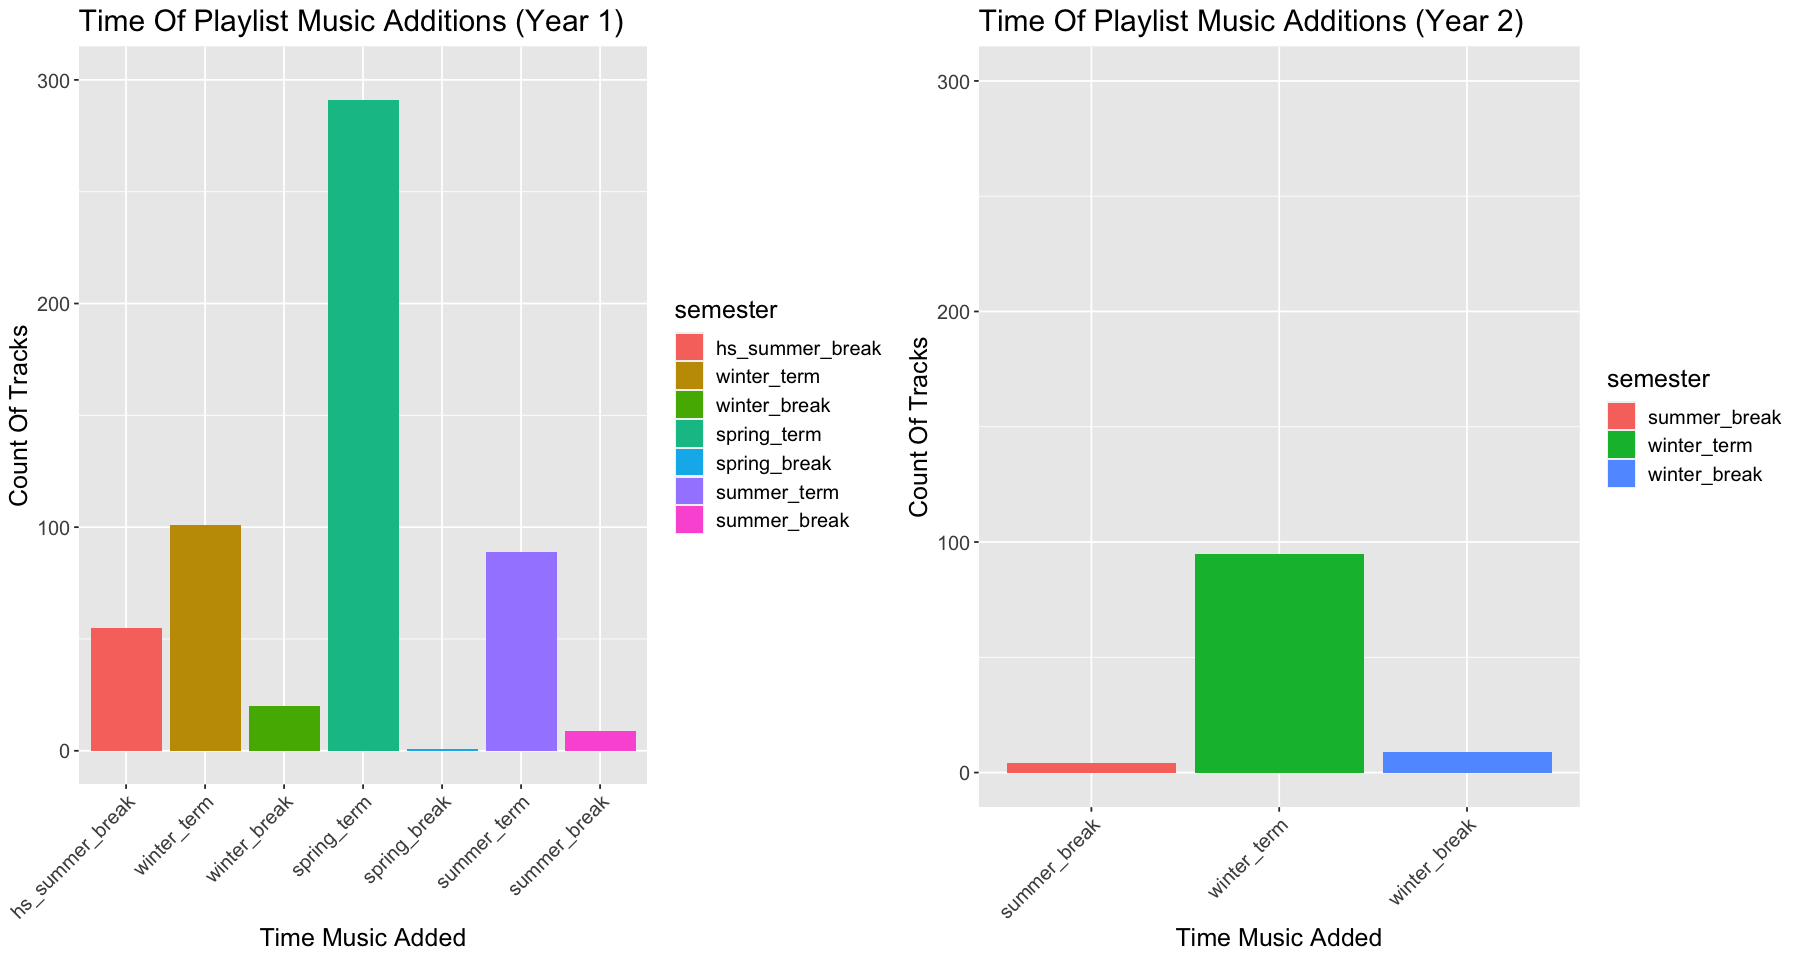

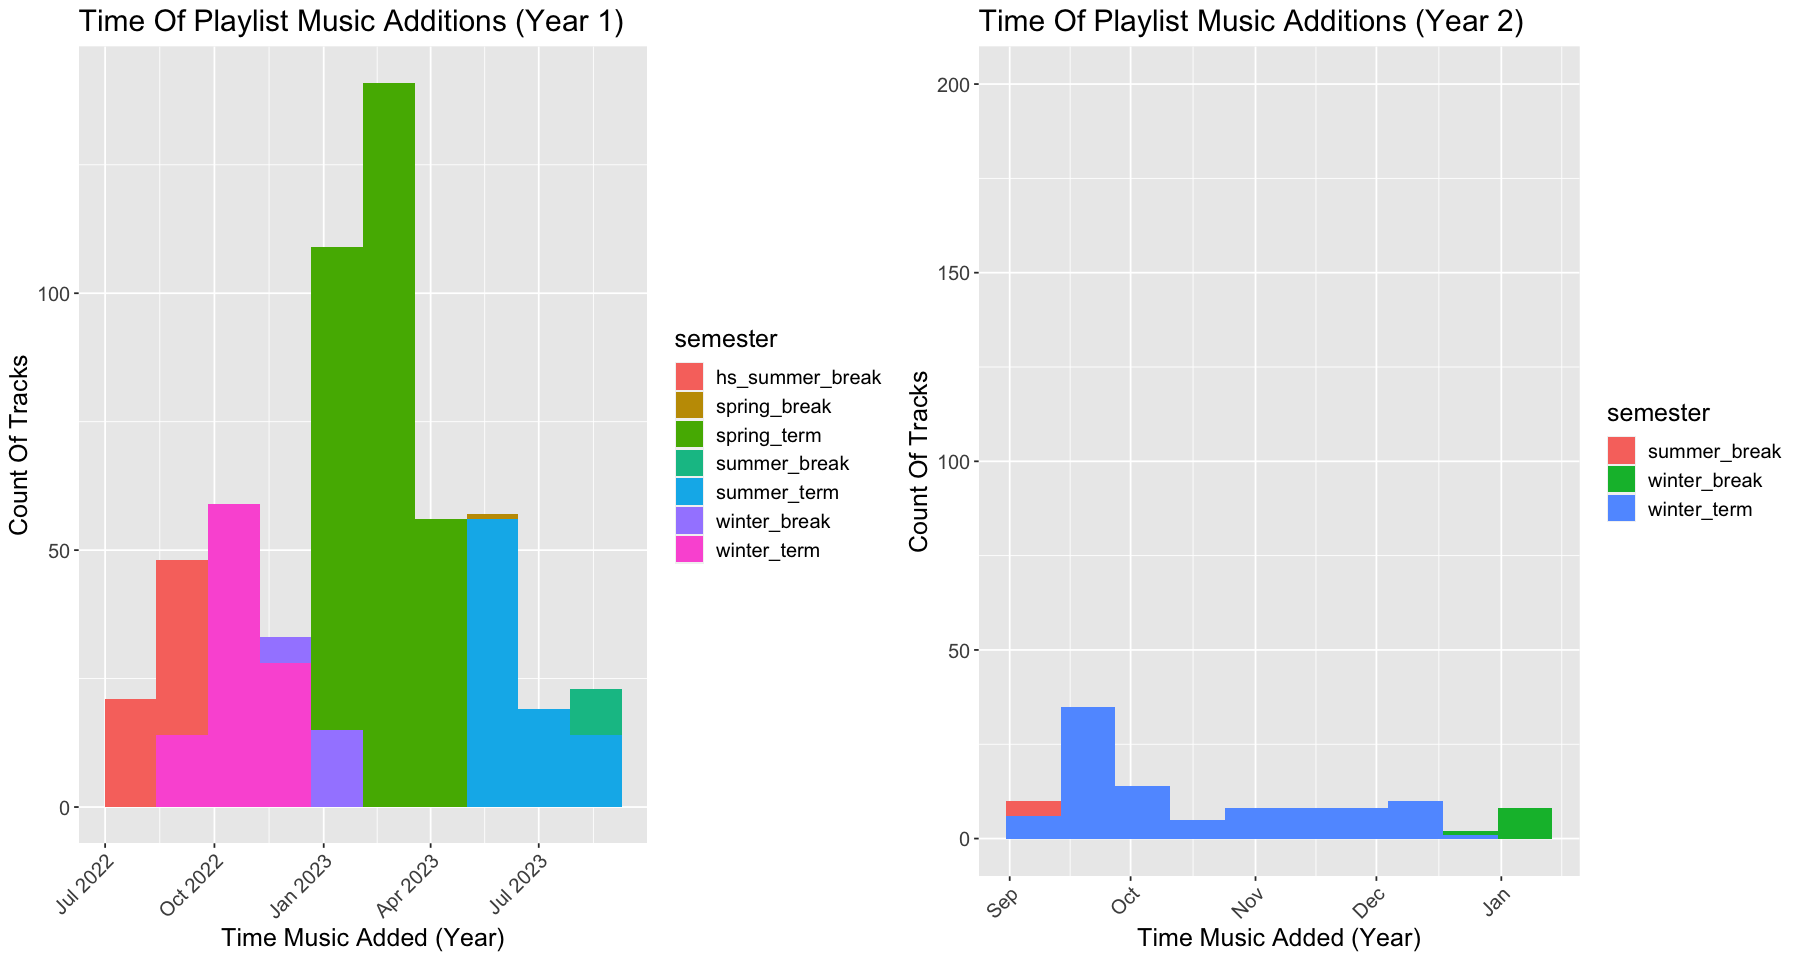

In [17]:
options(repr.plot.width = 15, repr.plot.height = 8)

y1_date_added_bar <- shortened_y1_playlist |>
                      mutate(semester = as_factor(semester)) |>
                      ggplot(aes(x = fct_reorder(semester, added_at), fill = semester)) +
                      geom_bar() +
                      labs(x = "Time Music Added", y = "Count Of Tracks") +
                      ggtitle("Time Of Playlist Music Additions (Year 1)") +
                      theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
                      theme(text = element_text(size = 15)) +
                      ylim(c(0, 300))

y2_date_added_bar <- shortened_y2_playlist |>
                      mutate(semester = as_factor(semester)) |>
                      ggplot(aes(x = fct_reorder(semester, added_at), fill = semester)) +
                      geom_bar() +
                      labs(x = "Time Music Added", y = "Count Of Tracks") +
                      ggtitle("Time Of Playlist Music Additions (Year 2)") +
                      theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
                      theme(text = element_text(size = 15)) +
                      ylim(c(0, 300))

y1_date_added_hist <- shortened_y1_playlist |>
                      ggplot(aes(x = added_at, fill = semester)) +
                      geom_histogram(bins = 10) +
                      labs(x = "Time Music Added (Year)", y = "Count Of Tracks") +
                      ggtitle("Time Of Playlist Music Additions (Year 1)") +
                      theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
                      theme(text = element_text(size = 15))

y2_date_added_hist <- shortened_y2_playlist |>
                      ggplot(aes(x = added_at, fill = semester)) +
                      geom_histogram(bins = 10) +
                      labs(x = "Time Music Added (Year)", y = "Count Of Tracks") +
                      ggtitle("Time Of Playlist Music Additions (Year 2)") +
                      theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
                      theme(text = element_text(size = 15)) +
                      ylim(c(0, 200))


plot_grid(y1_date_added_bar, y2_date_added_bar)
plot_grid(y1_date_added_hist, y2_date_added_hist)

We can understand the following from the graphs above:
- I added the same amount of songs to my playlists during winter term in both years
- I discovered/added less songs in the summer and winter breaks in year 2 than in year 1
- I added an uncharacteristically large amount of songs in my spring year 1 term
- I seem to add more songs during the middle and beginning of my terms during both years
- There is a nice normal curve of songs added in year 1, with center being around late February

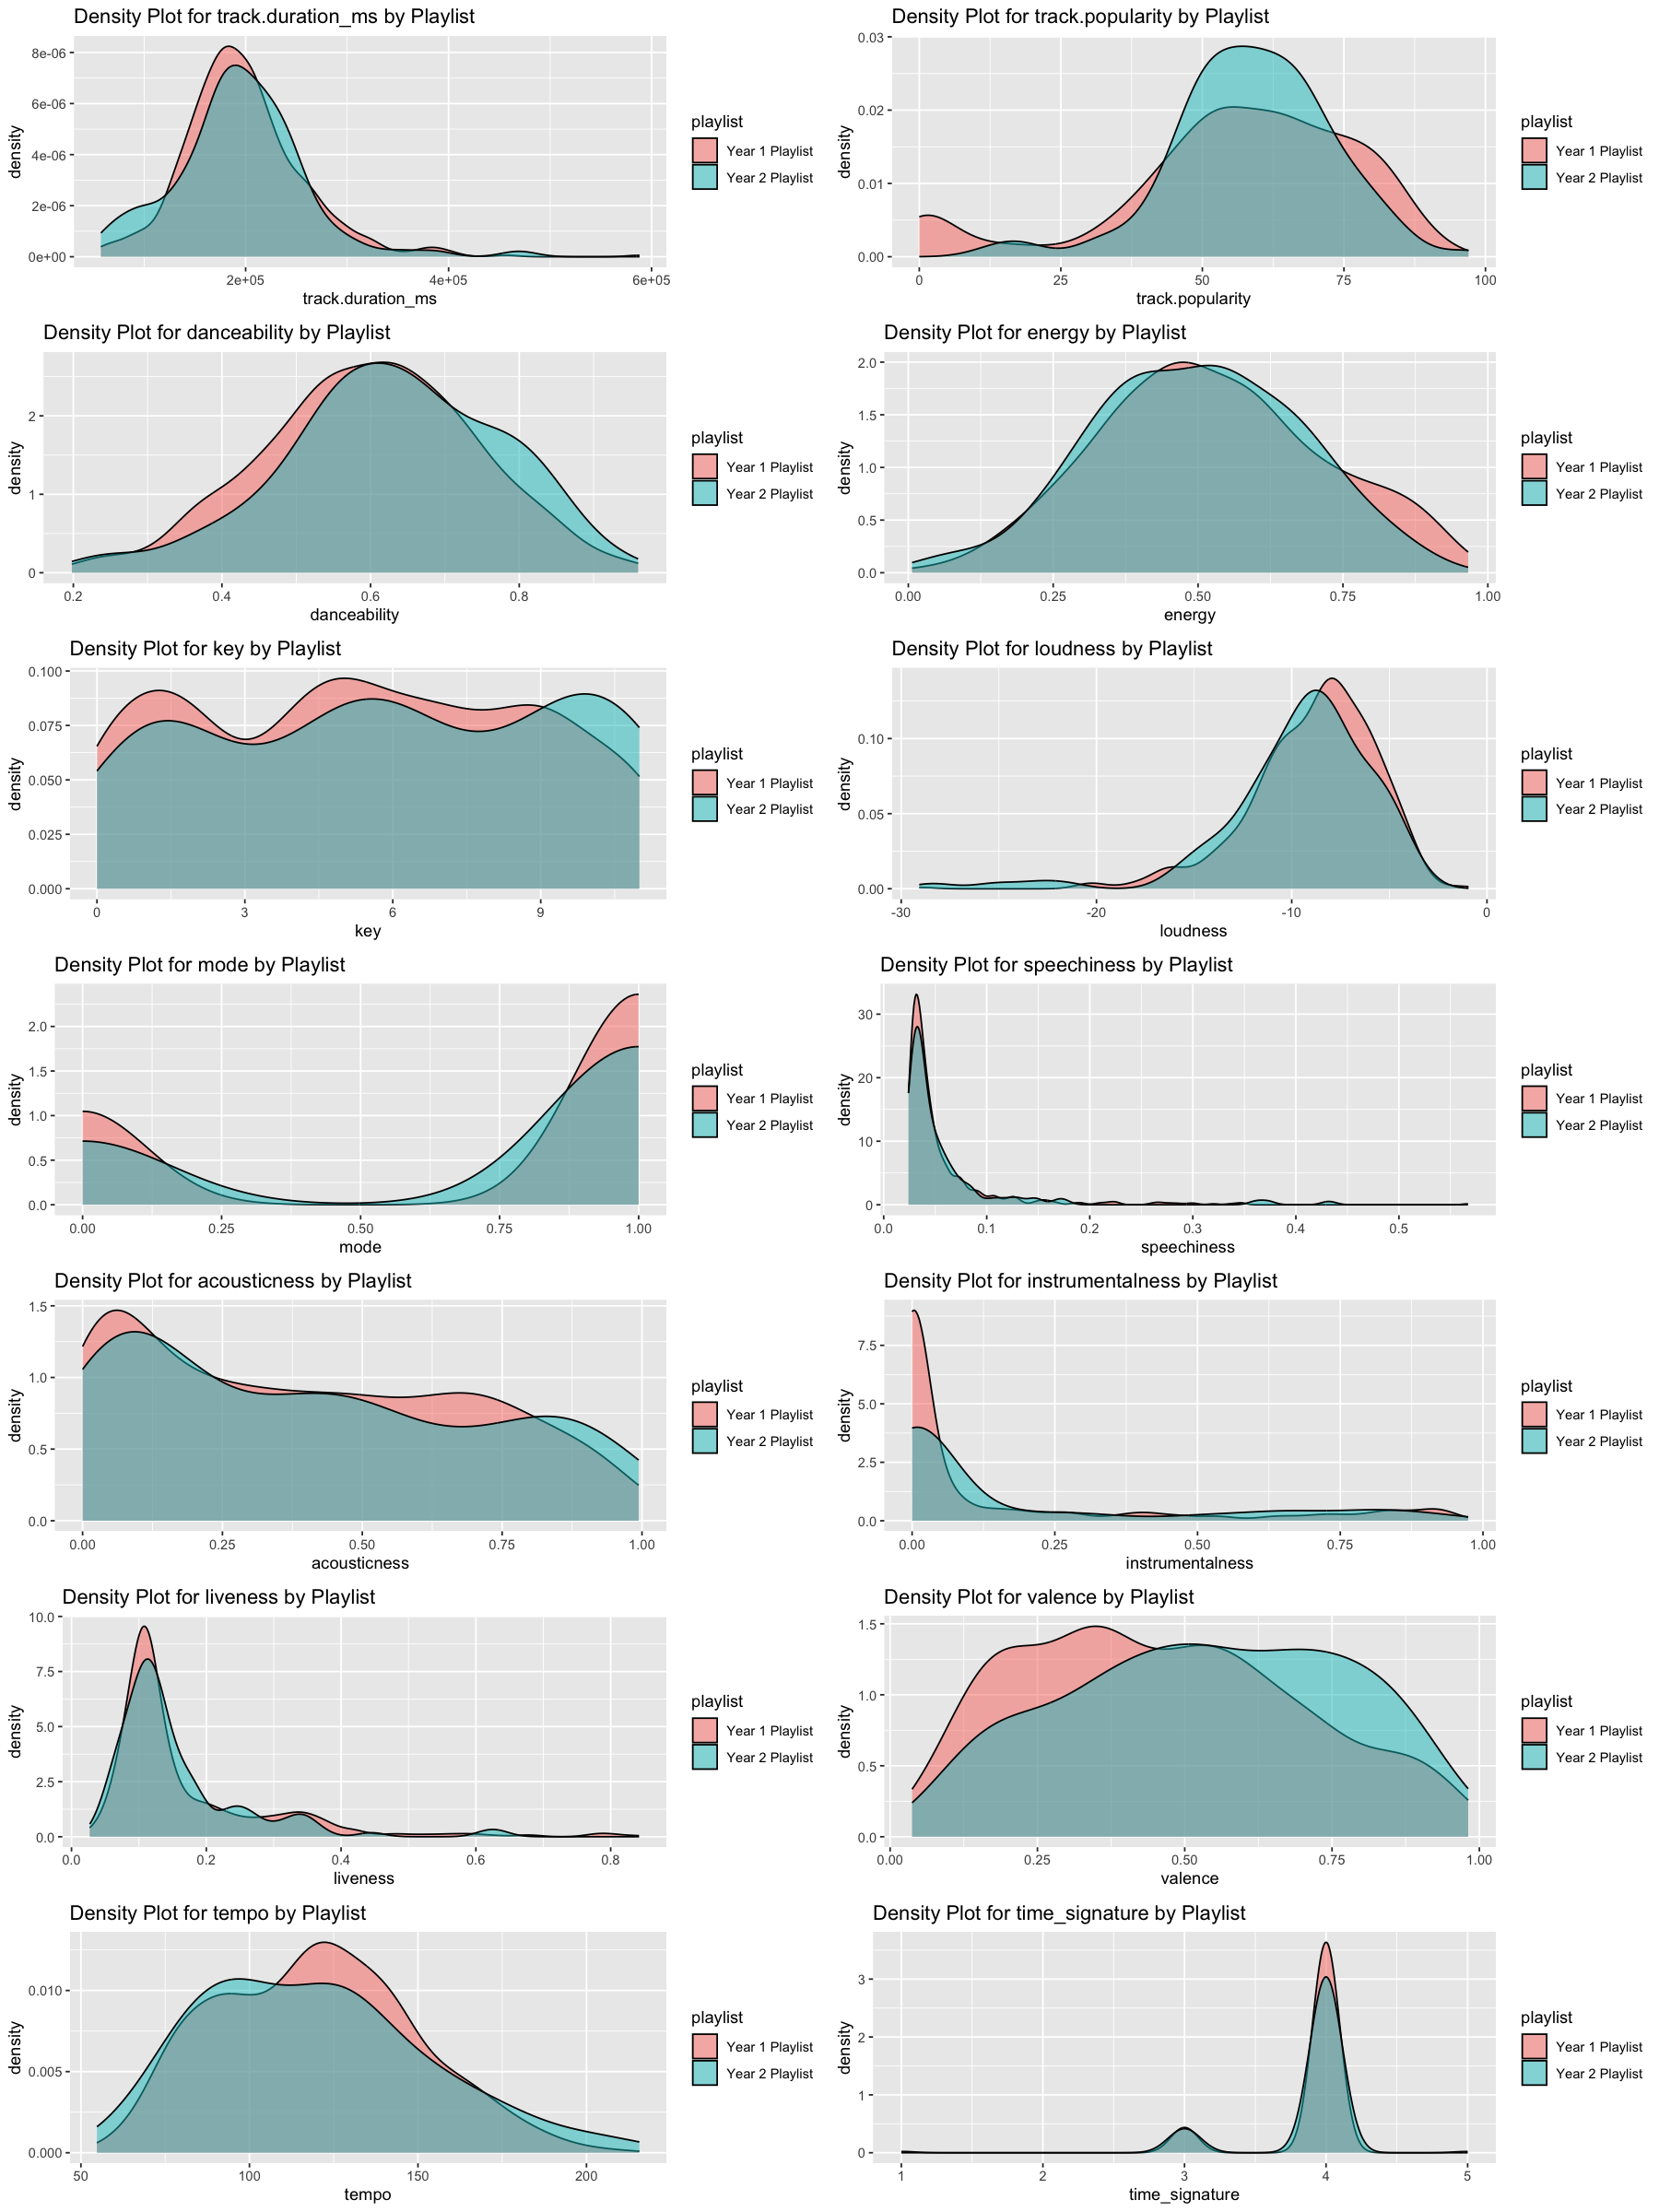

In [77]:
options(repr.plot.width = 15, repr.plot.height = 20)

numeric_columns <- combined_playlists |>
                    select(where(is.numeric)) |>
                    colnames()

# Graphing all numeric columns in separate panels as density plots

density_plot_list <- list()

for (variable in numeric_columns) {
    plot <- combined_playlists |>
            ggplot(aes(x = .data[[variable]], fill = playlist)) +
            geom_density(alpha = 0.5) +
            labs(title = paste("Density Plot for", variable, "by Playlist"))   
    density_plot_list[[variable]] <- plot

}

plot_grid(plotlist = density_plot_list, ncol = 2)

In [27]:
# Getting most popular genres in each playlist 

# First extracting the artists column from our data frame, which is a list containing information about
    # the artist(s) on the track, including their spotify identifier "id", which I'll use to identify genre
y1_listed_artists <- shortened_y1_playlist$track.artists
y1_all_ids <- lapply(y1_listed_artists, function(df) df$id) |>  # Getting all artists' id's in vector object
                      unlist()   
y1_all_genres <- lapply(y1_all_ids, function(id) get_artist(id)$genres) |>  #artist vector to tibble of genres
                      unlist() |> as_tibble()
head(y1_all_genres)

# Doing the same for playlist 2:
y2_listed_artists <- shortened_y2_playlist$track.artists
y2_all_ids <- lapply(y2_listed_artists, function(df) df$id) |>  # Getting all artists' id's in vector object
                      unlist()   
y2_all_genres <- lapply(y2_all_ids, function(id) get_artist(id)$genres) |>  #artist vector to tibble of genres
                      unlist() |> as_tibble()
head(y2_all_genres)


value
<chr>
indie pop
pop
uk pop
indonesian r&b
australian dance
australian electropop


value
<chr>
bedroom r&b
alternative r&b
art pop
escape room
indie soul
indietronica


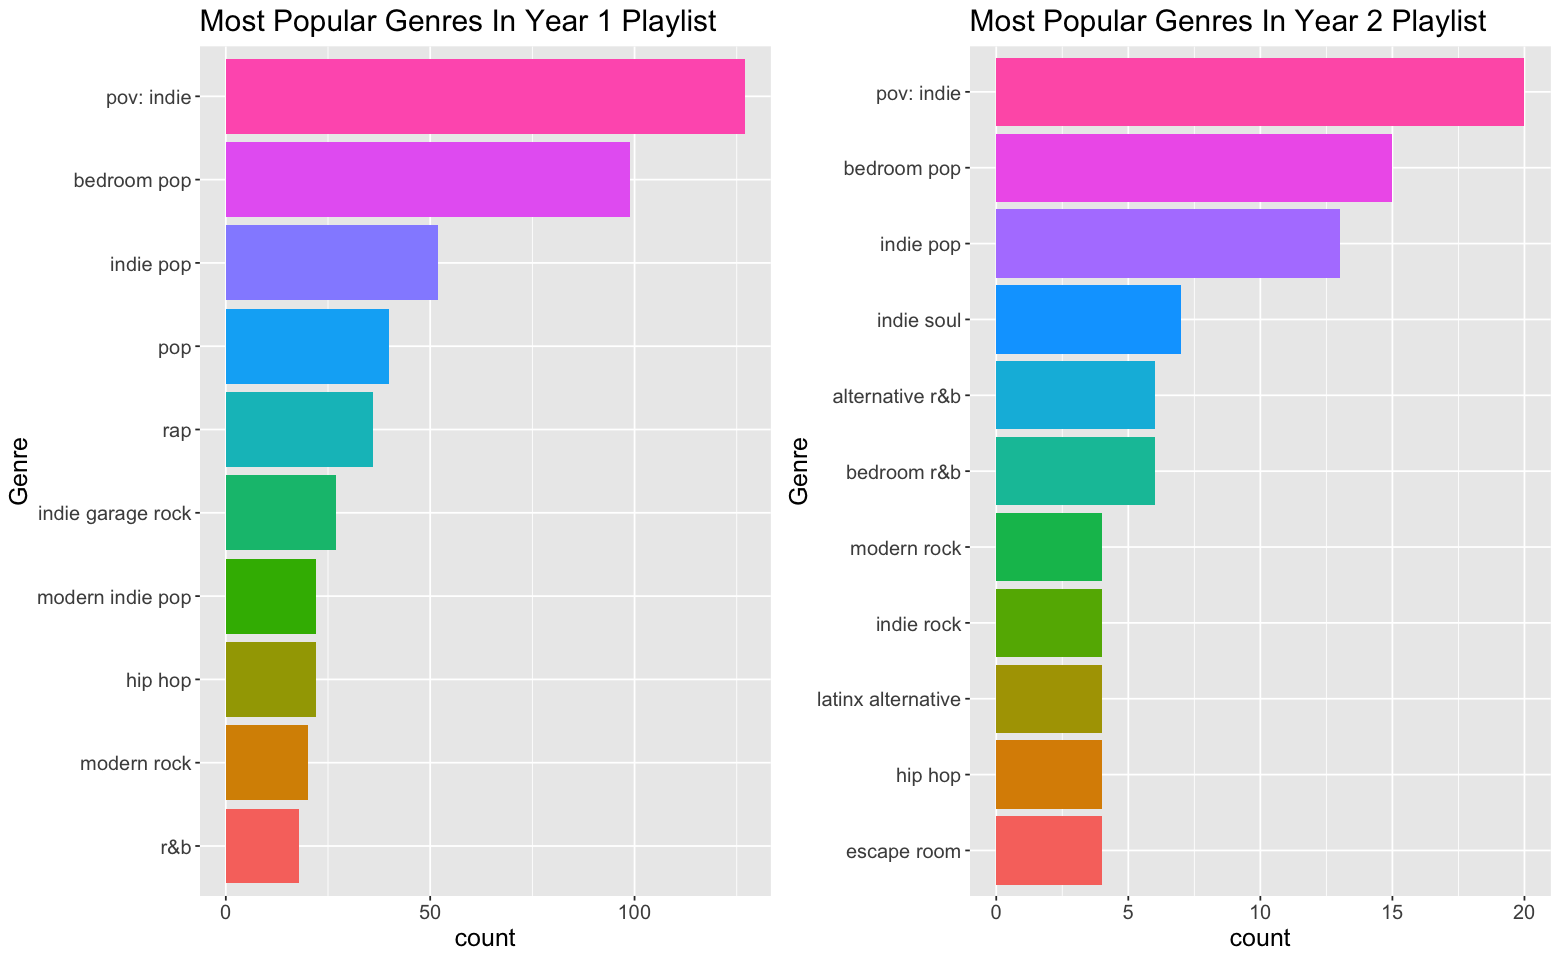

In [68]:
options(repr.plot.height = 8, repr.plot.width = 13)
# Plotting a bar graph
y1_bar <- y1_all_genres |> mutate(value = as_factor(value)) |>
            group_by(value) |> 
            summarize(count = n()) |>
            mutate(value = fct_reorder(value, count)) |>
            slice_max(order_by = count, n = 10) |>
            ggplot(aes(y = value, x = count,  fill = value))+
            geom_bar(stat = "identity") + labs(title = "Most Popular Genres In Year 1 Playlist", y = "Genre") +
            theme(text = element_text(size = 15), legend.position="none")
y2_bar <- y2_all_genres |> mutate(value = as_factor(value)) |>
            group_by(value) |> 
            summarize(count = n()) |>
            mutate(value = fct_reorder(value, count)) |>
            slice_max(order_by = count, n = 10) |>
            ggplot(aes(y = value, x = count, fill = value))+
            geom_bar(stat = "identity") + labs(title = "Most Popular Genres In Year 2 Playlist", y = "Genre") +
            theme(text = element_text(size = 15), legend.position="none")
plot_grid(y1_bar, y2_bar)

`summarise()` has grouped output by 'playlist'. You can override using the
`.groups` argument.


year,proportion
<chr>,<dbl>
year_1,0.1484099
year_2,0.1574074


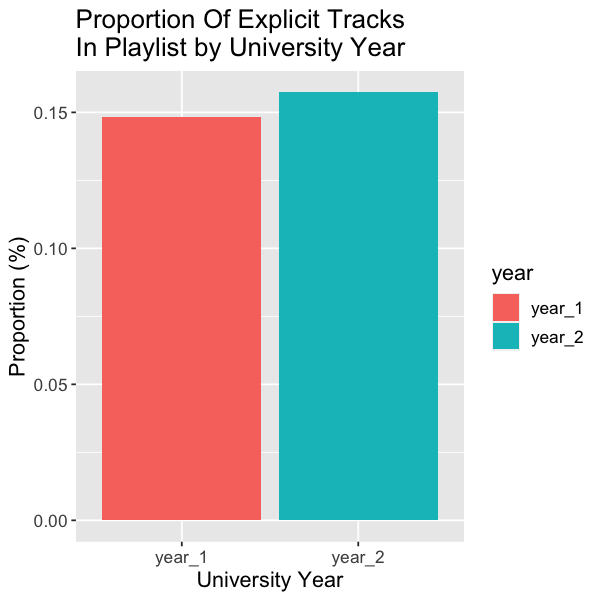

In [20]:
explicit_table <- combined_playlists |>
                    group_by(playlist, track.explicit) |>
                    summarize(count = n()) |>
                    pivot_wider(names_from = playlist, values_from = count) |>
                    mutate(total_1 = sum(`Year 1 Playlist`), total_2 = sum(`Year 2 Playlist`)) |>
                    filter(track.explicit == TRUE) |>
                    summarize(year_1 = `Year 1 Playlist`/total_1,
                             year_2 = `Year 2 Playlist`/total_2) |>
                    pivot_longer(cols = c(year_1, year_2), names_to = "year", values_to = "proportion")
explicit_table
explicit_plot <- explicit_table |>
                    ggplot(aes(x = year, y = proportion, fill = year)) +
                    geom_bar(stat = "identity") +
                    labs(title = "Proportion Of Explicit Tracks\nIn Playlist by University Year",
                        x = "University Year",
                        y = "Proportion (%)") +
                    theme(text = element_text(size = 13))
explicit_plot

In [79]:
# Most played/popular songs each year

favorite_songs <- combined_playlists |> group_by(playlist) |> 
                    slice_max(track.popularity, n = 5)
                    
                
favorite_songs


added_at,track.duration_ms,track.explicit,track.name,track.popularity,track.album.name,track.album.release_date,danceability,energy,key,⋯,acousticness,instrumentalness,liveness,valence,tempo,key_name,mode_name,key_mode,time_signature,playlist
<dttm>,<int>,<lgl>,<chr>,<int>,<chr>,<dttm>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
2022-08-11 01:21:39,183956,FALSE,I Wanna Be Yours,94,AM,2013-09-09,0.464,0.4170,0,⋯,0.13600,2.20e-02,0.0974,0.479,67.528,C,minor,C minor,4,Year 1 Playlist
2023-02-23 13:52:35,201800,TRUE,Snooze,92,SOS,2022-12-09,0.559,0.5510,5,⋯,0.14100,0.00e+00,0.1100,0.392,143.008,F,major,F major,4,Year 1 Playlist
2023-09-01 17:47:12,222369,FALSE,"What Was I Made For? [From The Motion Picture ""Barbie""]",92,"What Was I Made For? [From The Motion Picture ""Barbie""]",2023-07-13,0.444,0.0911,0,⋯,0.95900,1.05e-06,0.0980,0.142,78.403,C,major,C major,4,Year 1 Playlist
2023-01-02 15:33:38,180386,TRUE,See You Again (feat. Kali Uchis),91,Flower Boy,2017-07-21,0.558,0.5590,6,⋯,0.37100,7.49e-06,0.1090,0.620,78.558,F#,major,F# major,4,Year 1 Playlist
2022-08-15 02:19:58,184516,FALSE,Pink + White,90,Blonde,2016-08-20,0.545,0.5450,9,⋯,0.66700,5.48e-05,0.4170,0.549,159.940,A,major,A major,3,Year 1 Playlist
2023-11-12 22:29:28,137773,FALSE,My Love Mine All Mine,97,The Land Is Inhospitable and So Are We,2023-09-15,0.504,0.3080,9,⋯,0.86800,1.35e-01,0.1580,0.121,113.950,A,major,A major,4,Year 2 Playlist
2023-09-19 15:29:50,87000,FALSE,Evergreen,86,RMCM,2017-05-17,0.555,0.2160,3,⋯,0.55700,4.16e-03,0.1090,0.504,79.109,D#,major,D# major,3,Year 2 Playlist
2023-09-26 13:14:22,317293,TRUE,Les,84,Camp,2011-11-15,0.541,0.6740,1,⋯,0.00649,9.76e-05,0.2350,0.123,103.139,C#,minor,C# minor,4,Year 2 Playlist
2023-11-26 00:28:59,300106,FALSE,Careless Whisper,83,Ladies And Gentlemen... The Best Of George Michael,1998-11-09,0.574,0.6280,2,⋯,0.13000,0.00e+00,0.2710,0.803,153.119,D,minor,D minor,4,Year 2 Playlist
